In [207]:
import pandas as pd
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_rows', None)

### Data Understanding

In [208]:
df = pd.read_csv('train.csv')

In [209]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [210]:
df.shape

(1460, 81)

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [212]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [213]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

In [214]:
df.isnull().sum().sort_values()

Id                  0
TotalBsmtSF         0
Heating             0
SaleCondition       0
CentralAir          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
SaleType            0
YrSold              0
MoSold              0
MiscVal             0
PoolArea            0
ScreenPorch         0
BsmtUnfSF           0
3SsnPorch           0
OpenPorchSF         0
WoodDeckSF          0
PavedDrive          0
GarageArea          0
GarageCars          0
Fireplaces          0
EnclosedPorch       0
BsmtFinSF2          0
HeatingQC           0
SalePrice           0
LandSlope           0
LandContour         0
LotShape            0
Neighborhood        0
Condition1          0
Street              0
LotArea             0
MSZoning            0
BsmtFinSF1          0
Condition2

In [215]:
df.nunique().sort_values()

CentralAir          2
Utilities           2
Street              2
Alley               2
BsmtHalfBath        3
LandSlope           3
GarageFinish        3
HalfBath            3
PavedDrive          3
PoolQC              3
FullBath            4
MasVnrType          4
BsmtExposure        4
ExterQual           4
MiscFeature         4
BsmtFullBath        4
Fence               4
KitchenQual         4
BsmtCond            4
Fireplaces          4
LandContour         4
LotShape            4
KitchenAbvGr        4
BsmtQual            4
FireplaceQu         5
Electrical          5
YrSold              5
GarageCars          5
GarageQual          5
GarageCond          5
HeatingQC           5
ExterCond           5
MSZoning            5
LotConfig           5
BldgType            5
BsmtFinType2        6
Foundation          6
RoofStyle           6
SaleCondition       6
GarageType          6
BsmtFinType1        6
Heating             6
Functional          7
RoofMatl            8
HouseStyle          8
Condition2

## Data Cleaning & Treatment

In [216]:
# Change the data type from Integer to object as per the data dictonary
df['MSSubClass'] = df['MSSubClass'].astype('object')

Considering 15% as the missing value threshold for my anaysis

In [217]:
round(df.isnull().sum()/len(df.index),2)[round(df.isnull().sum()/len(df.index),2).values>0.15]

LotFrontage    0.18
Alley          0.94
FireplaceQu    0.47
PoolQC         1.00
Fence          0.81
MiscFeature    0.96
dtype: float64

In [218]:
df = df.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis='columns')

Checking the columns where the missing values between 0-15%

In [219]:
round(df.isnull().sum()/len(df.index),2)[round(df.isnull().sum()/len(df.index),2).values>0.00]

MasVnrType      0.01
MasVnrArea      0.01
BsmtQual        0.03
BsmtCond        0.03
BsmtExposure    0.03
BsmtFinType1    0.03
BsmtFinType2    0.03
GarageType      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
GarageCond      0.06
dtype: float64

Handelling Missing values (Imputing missing value) which was in the range of 0-15% missing. Utilizing the most repetative categorical value or the mean of the numerical value of the dataset

In [220]:
df.MasVnrType.fillna('None',inplace=True)
df.MasVnrArea.fillna(df.MasVnrArea.mean(),inplace=True)
df.BsmtQual.fillna('TA',inplace=True)
df.BsmtCond.fillna('TA',inplace=True)
df.BsmtExposure.fillna('No',inplace=True)
df.BsmtFinType1.fillna('Unf',inplace=True)
df.BsmtFinType2.fillna('Unf',inplace=True)
df.GarageType.fillna('Attchd',inplace=True)
df.GarageYrBlt.fillna(-1,inplace=True)
df.GarageFinish.fillna('Unf',inplace=True)
df.GarageQual.fillna('TA',inplace=True)
df.GarageCond.fillna('TA',inplace=True)

In [221]:
df.isnull().sum().sort_values()

Id               0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
Fireplaces       0
FullBath         0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
CentralAir       0
BsmtHalfBath     0
GarageType       0
GarageYrBlt      0
GarageFinish     0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageArea       0
GarageCars       0
HeatingQC        0
SaleCondition    0
Heating          0
BsmtUnfSF        0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
Street           0
LotArea          0
MSZoning         0
MSSubClass  

In [222]:
df.Street.value_counts()
df.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [223]:
df = df.drop(['Street','Utilities','Id'],axis='columns')

## EDA to see the pattern in the Data and to see the correlation

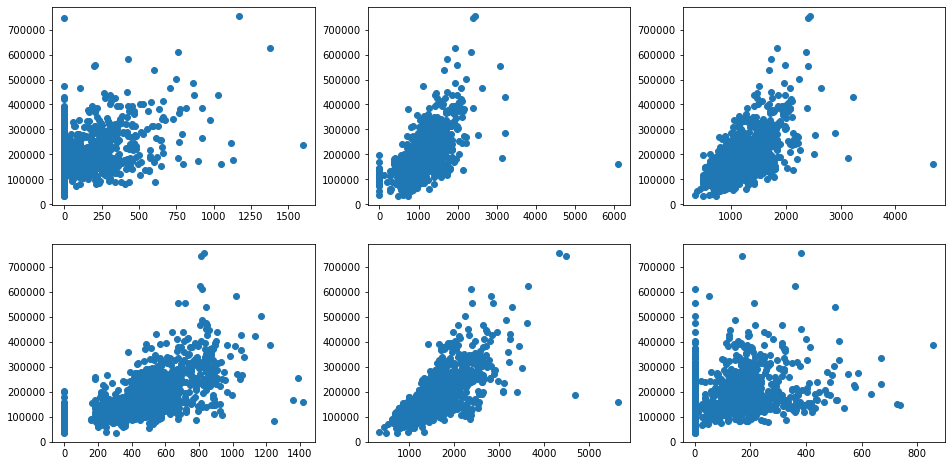

In [224]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(df['MasVnrArea'],df['SalePrice'])
plt.subplot(2,3,2)
plt.scatter(df['TotalBsmtSF'],df['SalePrice'])
plt.subplot(2,3,3)
plt.scatter(df['1stFlrSF'],df['SalePrice'])
plt.subplot(2,3,4)
plt.scatter(df['GarageArea'],df['SalePrice'])
plt.subplot(2,3,5)
plt.scatter(df['GrLivArea'],df['SalePrice'])
plt.subplot(2,3,6)
plt.scatter(df['WoodDeckSF'],df['SalePrice'])

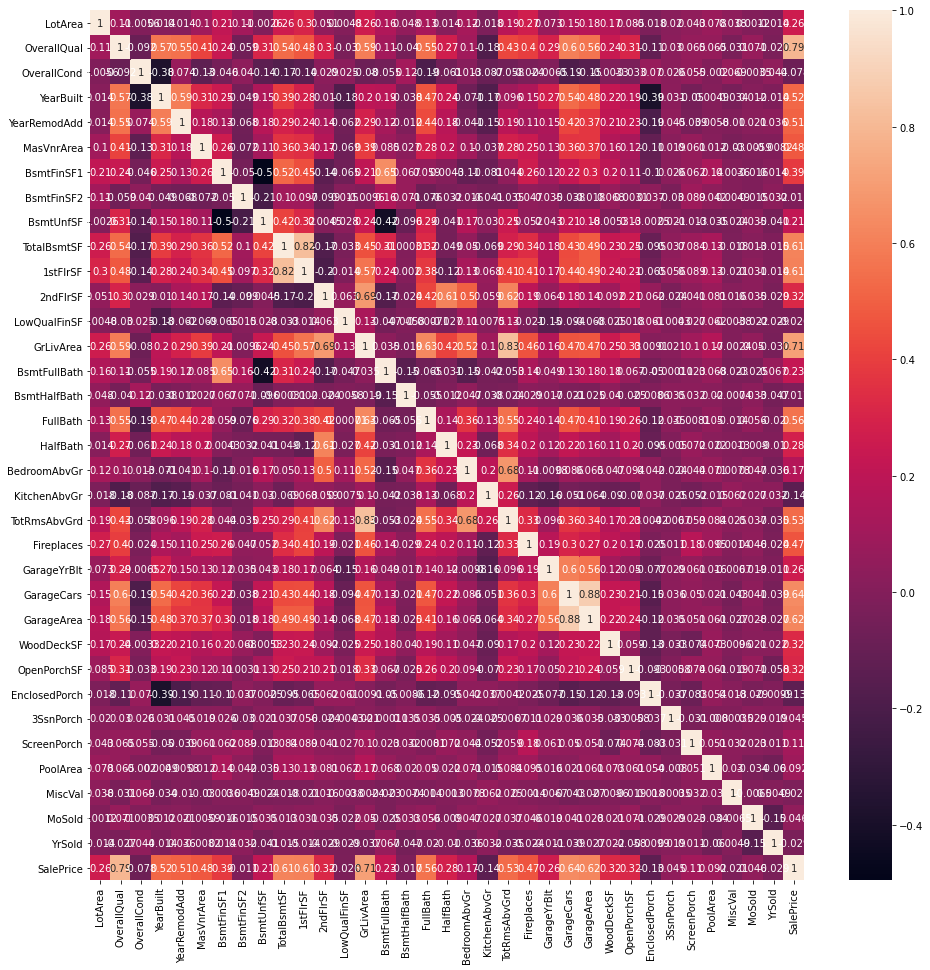

In [225]:
plt.figure(figsize=(16,16))
sns.heatmap(df[list(df.dtypes[df.dtypes!='object'].index)].corr(),annot=True)
plt.show()

In [226]:
df.shape

(1460, 72)

In [227]:
df[list(df.dtypes[df.dtypes=='object'].index)].head()

,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,20,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,60,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,70,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [228]:
df[list(df.dtypes[df.dtypes=='object'].index)].shape

(1460, 37)

Converting some of the Categorical values to numeric (Number Encoding)

In [229]:
df[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1


In [230]:
print(np.unique(df['LandSlope'].tolist()))
print(np.unique(df['ExterQual'].tolist()))
print(np.unique(df['BsmtQual'].tolist()))
print(np.unique(df['BsmtCond'].tolist()))
print(np.unique(df['BsmtExposure'].tolist()))
print(np.unique(df['BsmtFinType1'].tolist()))
print(np.unique(df['BsmtFinType2'].tolist()))
print(np.unique(df['HeatingQC'].tolist()))
print(np.unique(df['CentralAir'].tolist()))
print(np.unique(df['KitchenQual'].tolist()))
print(np.unique(df['GarageFinish'].tolist()))
print(np.unique(df['GarageQual'].tolist()))
print(np.unique(df['GarageCond'].tolist()))
print(np.unique(df['ExterCond'].tolist()))
print(np.unique(df['LotShape'].tolist()))

['Gtl' 'Mod' 'Sev']
['Ex' 'Fa' 'Gd' 'TA']
['Ex' 'Fa' 'Gd' 'TA']
['Fa' 'Gd' 'Po' 'TA']
['Av' 'Gd' 'Mn' 'No']
['ALQ' 'BLQ' 'GLQ' 'LwQ' 'Rec' 'Unf']
['ALQ' 'BLQ' 'GLQ' 'LwQ' 'Rec' 'Unf']
['Ex' 'Fa' 'Gd' 'Po' 'TA']
['N' 'Y']
['Ex' 'Fa' 'Gd' 'TA']
['Fin' 'RFn' 'Unf']
['Ex' 'Fa' 'Gd' 'Po' 'TA']
['Ex' 'Fa' 'Gd' 'Po' 'TA']
['Ex' 'Fa' 'Gd' 'Po' 'TA']
['IR1' 'IR2' 'IR3' 'Reg']


In [231]:
df['LandSlope'] = df.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
df['ExterQual'] = df.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['BsmtQual'] = df.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtCond'] = df.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtExposure'] = df.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df['BsmtFinType1'] = df.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['BsmtFinType2'] = df.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['HeatingQC'] = df.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['CentralAir'] = df.CentralAir.map({'N':0,'Y':1})
df['KitchenQual'] = df.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['GarageFinish'] = df.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
df['GarageQual'] = df.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['GarageCond'] = df.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['ExterCond'] = df.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['LotShape'] = df.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [232]:
print(np.unique(df['LandSlope'].tolist()))
print(np.unique(df['ExterQual'].tolist()))
print(np.unique(df['BsmtQual'].tolist()))
print(np.unique(df['BsmtCond'].tolist()))
print(np.unique(df['BsmtExposure'].tolist()))
print(np.unique(df['BsmtFinType1'].tolist()))
print(np.unique(df['BsmtFinType2'].tolist()))
print(np.unique(df['HeatingQC'].tolist()))
print(np.unique(df['CentralAir'].tolist()))
print(np.unique(df['KitchenQual'].tolist()))
print(np.unique(df['GarageFinish'].tolist()))
print(np.unique(df['GarageQual'].tolist()))
print(np.unique(df['GarageCond'].tolist()))
print(np.unique(df['ExterCond'].tolist()))
print(np.unique(df['LotShape'].tolist()))

[0 1 2]
[1 2 3 4]
[2 3 4 5]
[1 2 3 4]
[1 2 3 4]
[1 2 3 4 5 6]
[1 2 3 4 5 6]
[0 1 2 3 4]
[0 1]
[1 2 3 4]
[1 2 3]
[1 2 3 4 5]
[1 2 3 4 5]
[0 1 2 3 4]
[0 1 2 3]


In [233]:
df[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


Creating and joining dummy column with the actual dataset

In [234]:
dummy_col = pd.get_dummies(df[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)

df = pd.concat([df,dummy_col],axis='columns')

df = df.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'],axis='columns')

Sales Price the target variable and its distribution 

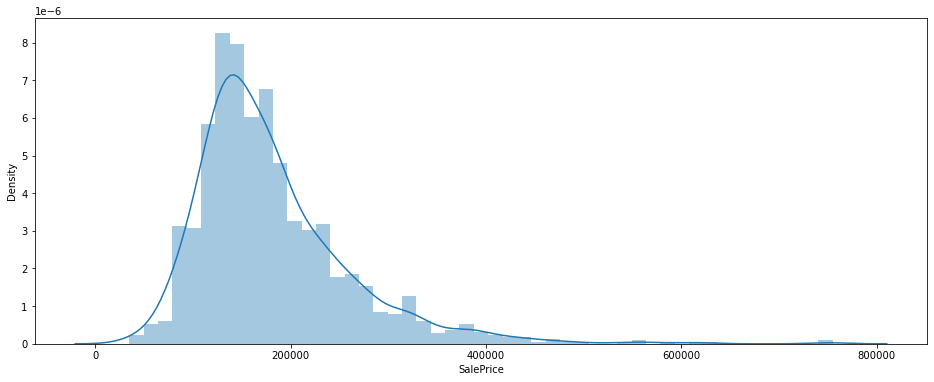

In [235]:
plt.figure(figsize=(16,6))
sns.distplot(df['SalePrice'])
plt.show()

### Train Test Split for the dataset

In [236]:
df_train,df_test = train_test_split(df,train_size=0.7,test_size=0.3,random_state=42)

In [237]:
numeric_col = ['MSSubClass','LotArea','OverallQual','OverallCond',
           'MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
df_train[numeric_col] = scaler.fit_transform(df_train[numeric_col])
df_test[numeric_col] = scaler.transform(df_test[numeric_col])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

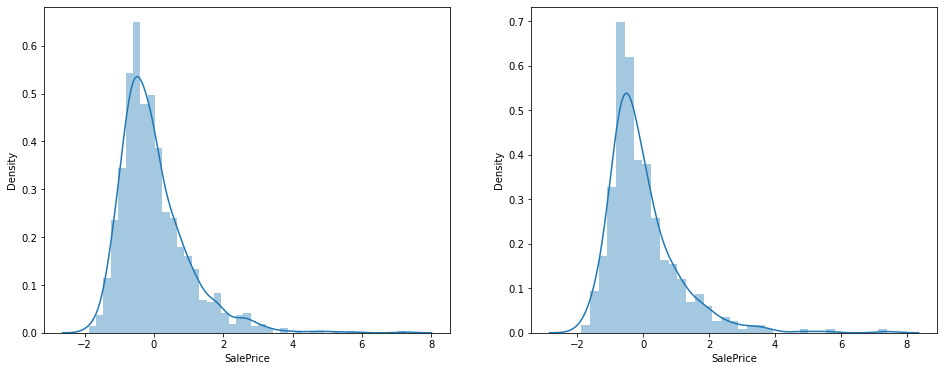

In [238]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train['SalePrice'])
plt.subplot(122)
sns.distplot(df_test['SalePrice'])

Above: Seeing that we have a unique sales price distribution on Test and train Split

Seperating the independent and dependent variables from the dtrain & dtest

In [239]:
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

In [240]:
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)
print(X_test.shape)

(1021, 195)
(1021,)
(438,)
(438, 195)


Lets initialy model the Linear Regression model.

In [241]:
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,70)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=70)

In [242]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [243]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

In [244]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

In [245]:
X_train.head()

,OverallQual,ExterQual,BsmtQual,BsmtExposure,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,KitchenQual,LandContour_HLS,LotConfig_CulDSac,LotConfig_FR3,Neighborhood_Edwards,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_NAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_StoneBr,Condition1_Norm,Condition1_RRAe,Condition2_PosN,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,RoofMatl_CompShg,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_CBlock,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_Brk Cmn,Exterior2nd_CBlock,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Wood,Heating_OthW,Heating_Wall,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_Con,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Partial
135,0.636468,2,3,1,-0.971407,0.546680,1.316609,-0.802940,-0.120373,0.287742,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
1452,-0.822194,2,4,4,0.218347,-1.145636,-0.250050,-0.802940,-0.120373,-0.861096,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
762,0.636468,2,4,2,-0.919206,-0.678405,-1.041084,0.972627,-0.120373,0.033491,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
932,2.095130,4,5,1,-0.971407,1.890249,1.889338,-0.802940,-0.120373,0.707727,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
435,0.636468,3,4,3,-0.134012,-0.582276,-0.879282,1.088277,-0.120373,0.248192,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0


### Lets try Lasso regression with fixed Alpha value

In [246]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8540079972624912
0.8687526160111434


In [247]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = X_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('OverallQual', -2.048),
 ('ExterQual', 0.244),
 ('BsmtQual', 0.106),
 ('BsmtExposure', 0.16),
 ('BsmtFinSF1', 0.108),
 ('TotalBsmtSF', 0.077),
 ('1stFlrSF', -0.047),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.034),
 ('GrLivArea', -0.004),
 ('KitchenQual', 0.396),
 ('LandContour_HLS', 0.144),
 ('LotConfig_CulDSac', 0.215),
 ('LotConfig_FR3', 0.184),
 ('Neighborhood_Edwards', -0.0),
 ('Neighborhood_IDOTRR', -0.19),
 ('Neighborhood_MeadowV', -0.194),
 ('Neighborhood_NAmes', -0.0),
 ('Neighborhood_NoRidge', -0.08),
 ('Neighborhood_NridgHt', 0.519),
 ('Neighborhood_OldTown', 0.531),
 ('Neighborhood_SWISU', -0.187),
 ('Neighborhood_StoneBr', -0.176),
 ('Condition1_Norm', 0.518),
 ('Condition1_RRAe', 0.138),
 ('Condition2_PosN', -0.0),
 ('BldgType_Duplex', -1.482),
 ('BldgType_Twnhs', -0.282),
 ('BldgType_TwnhsE', -0.436),
 ('HouseStyle_1.5Unf', -0.391),
 ('HouseStyle_1Story', 0.0),
 ('RoofMatl_CompShg', 0.267),
 ('RoofMatl_Metal', 0.3),
 ('RoofMatl_Roll', 0.0),
 ('RoofMatl_Tar&Grv', 0.0),
 ('

Lets implement the same with crossvalidation with varying alpha and with Kfold methodology. 

In [248]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [249]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.020292,0.003360,0.001900,0.000538,0.001,{'alpha': 0.001},0.866488,0.901063,0.852317,0.856192,0.824233,0.291976,0.822996,0.623137,0.802654,0.888203,0.772926,0.176485,1,0.853711,0.850659,0.856979,0.853498,0.857193,0.885760,0.858040,0.863335,0.853444,0.849672,0.858229,0.009914
1,0.004223,0.000444,0.001604,0.000492,0.010,{'alpha': 0.01},0.859850,0.884658,0.868783,0.839007,0.800068,0.223771,0.790635,0.547053,0.820359,0.851620,0.748580,0.197421,2,0.798967,0.794277,0.799581,0.797480,0.801353,0.836177,0.804129,0.819669,0.791678,0.795169,0.803848,0.013036
2,0.003115,0.000579,0.001847,0.000549,0.100,{'alpha': 0.1},0.799707,0.834764,0.796885,0.754359,0.728963,0.344612,0.693770,0.564244,0.716115,0.761414,0.699483,0.137870,3,0.732876,0.731278,0.735730,0.733491,0.736204,0.781900,0.740014,0.759939,0.715030,0.728359,0.739482,0.017639
3,0.002526,0.000532,0.001799,0.000400,1.000,{'alpha': 1.0},-0.000056,-0.002887,-0.025191,-0.009947,-0.014324,-0.005972,-0.014483,-0.001159,-0.044317,-0.022994,-0.014133,0.012997,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.002803,0.000400,0.001624,0.000509,5.000,{'alpha': 5.0},-0.000056,-0.002887,-0.025191,-0.009947,-0.014324,-0.005972,-0.014483,-0.001159,-0.044317,-0.022994,-0.014133,0.012997,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


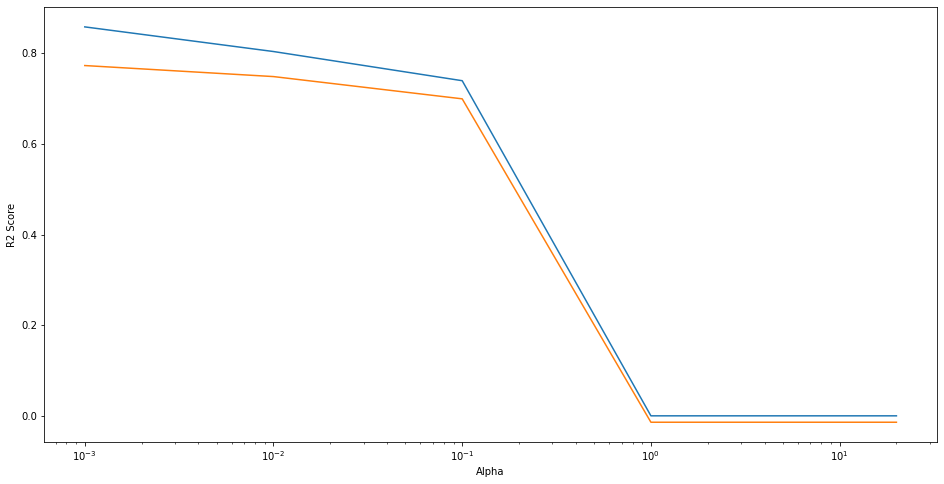

In [250]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

Checking the best parameter(Alpha value)

In [251]:
model_cv.best_params_

{'alpha': 0.001}

In [252]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8540079972624912
0.8687526160111434


In [253]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [254]:
print('Lasso Regression')
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

Lasso Regression


,Featuere,Coef
37,Exterior1st_BrkComm,0.749964
20,Neighborhood_OldTown,0.531438
19,Neighborhood_NridgHt,0.519386
23,Condition1_Norm,0.518469
50,Exterior2nd_Plywood,0.513832
10,KitchenQual,0.396116
32,RoofMatl_Metal,0.299870
31,RoofMatl_CompShg,0.266980
1,ExterQual,0.244111
12,LotConfig_CulDSac,0.214542


Doubling the alpha value to see the results

In [255]:
lasso = Lasso(alpha=0.002)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8449826930476525
0.8672911326247406


In [256]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','double Coef']

In [257]:
print('Lasso Regression')
lasso_coef.sort_values(by='double Coef',ascending=False).head(10)

Lasso Regression


,Featuere,double Coef
19,Neighborhood_NridgHt,0.487921
20,Neighborhood_OldTown,0.477383
23,Condition1_Norm,0.451287
10,KitchenQual,0.388175
37,Exterior1st_BrkComm,0.310899
50,Exterior2nd_Plywood,0.268132
31,RoofMatl_CompShg,0.250940
1,ExterQual,0.249108
12,LotConfig_CulDSac,0.201480
13,LotConfig_FR3,0.165744


### Lets go with Ridge Regression 

In [258]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.894436501914521
0.7517090642428316


In [259]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [260]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.003209,0.000515,0.001656,0.000433,0.001,{'alpha': 0.001},0.889991,0.884336,-0.068620,0.874216,0.831667,0.263701,0.117329,0.583563,0.786075,0.899970,0.606223,0.348054,10,0.893774,0.893868,0.893567,0.895291,0.899446,0.892726,0.898350,0.905981,0.900875,0.892474,0.896635,0.004193
1,0.003705,0.002869,0.001941,0.000550,0.010,{'alpha': 0.01},0.888678,0.886737,0.050277,0.874124,0.830901,0.264265,0.208623,0.591537,0.789494,0.900145,0.628478,0.313059,9,0.893485,0.893554,0.893365,0.894991,0.899149,0.892725,0.898133,0.905667,0.900524,0.892170,0.896376,0.004155
2,0.002668,0.000552,0.001494,0.000526,0.100,{'alpha': 0.1},0.877681,0.894264,0.562614,0.869662,0.824917,0.269473,0.602848,0.626554,0.806812,0.898344,0.723317,0.194441,8,0.884791,0.884129,0.886253,0.885942,0.890133,0.892643,0.890533,0.896146,0.890030,0.882899,0.888350,0.004005
3,0.003130,0.000296,0.001380,0.000429,0.200,{'alpha': 0.2},0.871191,0.895477,0.712667,0.865880,0.821893,0.274481,0.719270,0.637418,0.815564,0.896164,0.751001,0.179229,7,0.877629,0.876375,0.879514,0.878473,0.882636,0.892441,0.883334,0.888271,0.881292,0.875190,0.881516,0.005142
4,0.003192,0.000400,0.001595,0.000489,0.500,{'alpha': 0.5},0.864227,0.896601,0.815140,0.860940,0.819572,0.286055,0.799711,0.643746,0.827682,0.892776,0.770645,0.175241,6,0.867859,0.865767,0.869385,0.868259,0.872273,0.891496,0.872490,0.877722,0.868804,0.864609,0.871866,0.007448


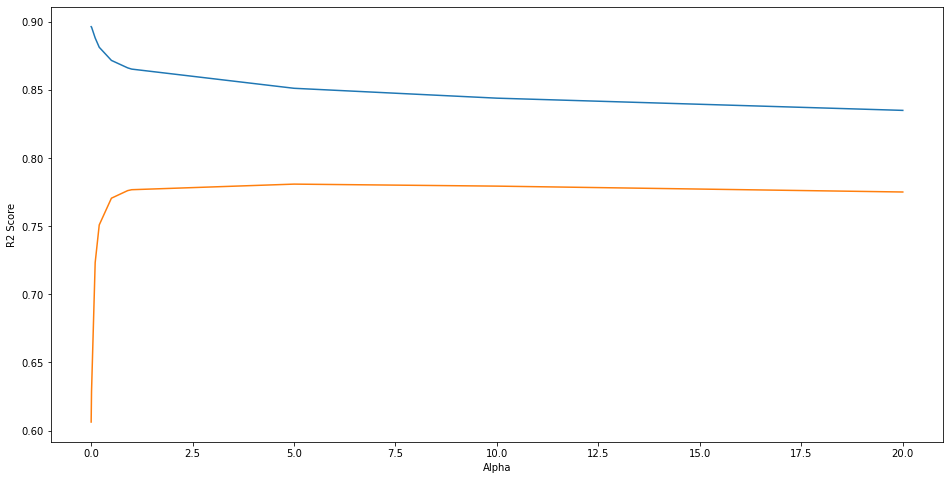

In [261]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

Lets check the best parameters for the alpha

In [262]:
model_cv.best_params_

{'alpha': 5.0}

In [263]:
ridge = Ridge(alpha = 5.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.8496936866614424
0.8642429771160564


In [276]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']
print('Ridge Regression')
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

Ridge Regression


,Feaure,Coef
20,Neighborhood_OldTown,0.400603
19,Neighborhood_NridgHt,0.396169
23,Condition1_Norm,0.342825
31,RoofMatl_CompShg,0.260969
1,ExterQual,0.247354
37,Exterior1st_BrkComm,0.238829
10,KitchenQual,0.231171
50,Exterior2nd_Plywood,0.226202
12,LotConfig_CulDSac,0.190747
13,LotConfig_FR3,0.176700


Doubling the alpha value to see the results

In [266]:
ridge = Ridge(alpha = 10.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.8428648867271038
0.8632895001023284


In [267]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Double Coef']

In [268]:
print('Ridge Regression')
ridge_coef.sort_values(by='Double Coef',ascending=False).head(10)

Ridge Regression


,Feaure,Double Coef
20,Neighborhood_OldTown,0.400603
19,Neighborhood_NridgHt,0.396169
23,Condition1_Norm,0.342825
31,RoofMatl_CompShg,0.260969
1,ExterQual,0.247354
37,Exterior1st_BrkComm,0.238829
10,KitchenQual,0.231171
50,Exterior2nd_Plywood,0.226202
12,LotConfig_CulDSac,0.190747
13,LotConfig_FR3,0.176700


### Based on the models Ridge and Lasso we can see that the r2_scores are almost same for both of them but as lasso has more importance on the dataset so based on that we can consider going ahead in selecting the model

In [269]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8540079972624912
0.8687526160111434


In [270]:
print(y_train.shape)
print(y_train_pred.shape)
print(y_test.shape)
print(y_test_pred.shape)
print("###################")
print(X_train.shape)
print(X_test.shape)

(1021,)
(1021,)
(438,)
(438,)
###################
(1021, 70)
(438, 70)


#### Best alpha value for Lasso : {'alpha': 0.01}
#### Best alpha value for Ridge : {'alpha': 5.0}

Removing the 5 best features from Lasso Regression

In [271]:
X_train.columns

Index(['OverallQual', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'KitchenQual', 'LandContour_HLS', 'LotConfig_CulDSac', 'LotConfig_FR3',
       'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_NAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_StoneBr',
       'Condition1_Norm', 'Condition1_RRAe', 'Condition2_PosN',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'RoofMatl_CompShg',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_BrkComm',
       'Exterior1st_CBlock', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_VinylSd',
       'Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 'Exteri

In [272]:
X_train_drp = X_train.drop(['Exterior1st_BrkComm','Neighborhood_OldTown','Neighborhood_NridgHt','Condition1_Norm','Exterior2nd_Plywood'], axis = 1)
X_test_drp = X_test.drop(['Exterior1st_BrkComm','Neighborhood_OldTown','Neighborhood_NridgHt','Condition1_Norm','Exterior2nd_Plywood'], axis = 1)

In [274]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train_drp,y_train)

y_train_pred = lasso.predict(X_train_drp)
y_test_pred = lasso.predict(X_test_drp)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8386964436486302
0.8524416604971085


In [277]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train_drp.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']
print('Lasso Regression')
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

Lasso Regression


,Feaure,Coef
20,Neighborhood_StoneBr,0.400603
19,Neighborhood_SWISU,0.396169
23,BldgType_Duplex,0.342825
31,RoofMatl_Tar&Grv,0.260969
1,ExterQual,0.247354
37,Exterior1st_Plywood,0.238829
10,KitchenQual,0.231171
50,Foundation_Slab,0.226202
12,LotConfig_CulDSac,0.190747
13,LotConfig_FR3,0.176700
